# FRAUD DETECTION SYSTEM - ANALYSIS

## Loading the Data Set

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("creditcard.csv")

# Display the first few rows of the DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Identifying Variables

In [2]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data frame has 31 variables 
* there is one time variable
* there are 28 anonymous variables
* and one class variable

In [3]:
# Display descriptive statistics for numerical variables
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758702e-12 -8.252296e-13 -9.637438e-13  8.316234e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.592013e-13  4.247308e-13 -3.050183e-13  8.692882e-14 -1.179710e-12   
std    1.380247e+00  1.332271e+00  1.23709

Data frame only has numerical variables 
The structure and content of the data set is now understood.

## Data Cleaning and Preprocessing

### Checking for missing values
his is essential as missing values can affect the performance of machine learning models if not handled properly.

In [4]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Data frame doesn't have missing values 

### Check for Outliers:
Boxplots and descriptive statistics were used to identify outliers in numerical variables.
Extreme values in the boxplots and columns with a wide range between the minimum and maximum values are indicators of outliers

In [5]:
descriptive_stats = df.describe()

# Print descriptive statistics
print(descriptive_stats)

# Calculate IQR for each numerical variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=0)
print("Outliers:")
print(outliers)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758702e-12 -8.252296e-13 -9.637438e-13  8.316234e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.592013e-13  4.247308e-13 -3.050183e-13  8.692882e-14 -1.179710e-12   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def find_outliers_iqr(data):
    outliers = pd.DataFrame(index=data.index)
    
    for column in data.columns:
        # Check if the column is numerical
        if np.issubdtype(data[column].dtype, np.number):
            # Calculate the first and third quartiles
            Q1 = np.percentile(data[column], 25)
            Q3 = np.percentile(data[column], 75)

            # Calculate the IQR
            IQR = Q3 - Q1

            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outliers
            outliers[column] = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return outliers

# Find outliers
outliers = find_outliers_iqr(df)

# Count the number of outliers for each variable
outliers_count = outliers.sum()
print("Number of outliers for each variable:")
print(outliers_count)

Number of outliers for each variable:
Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


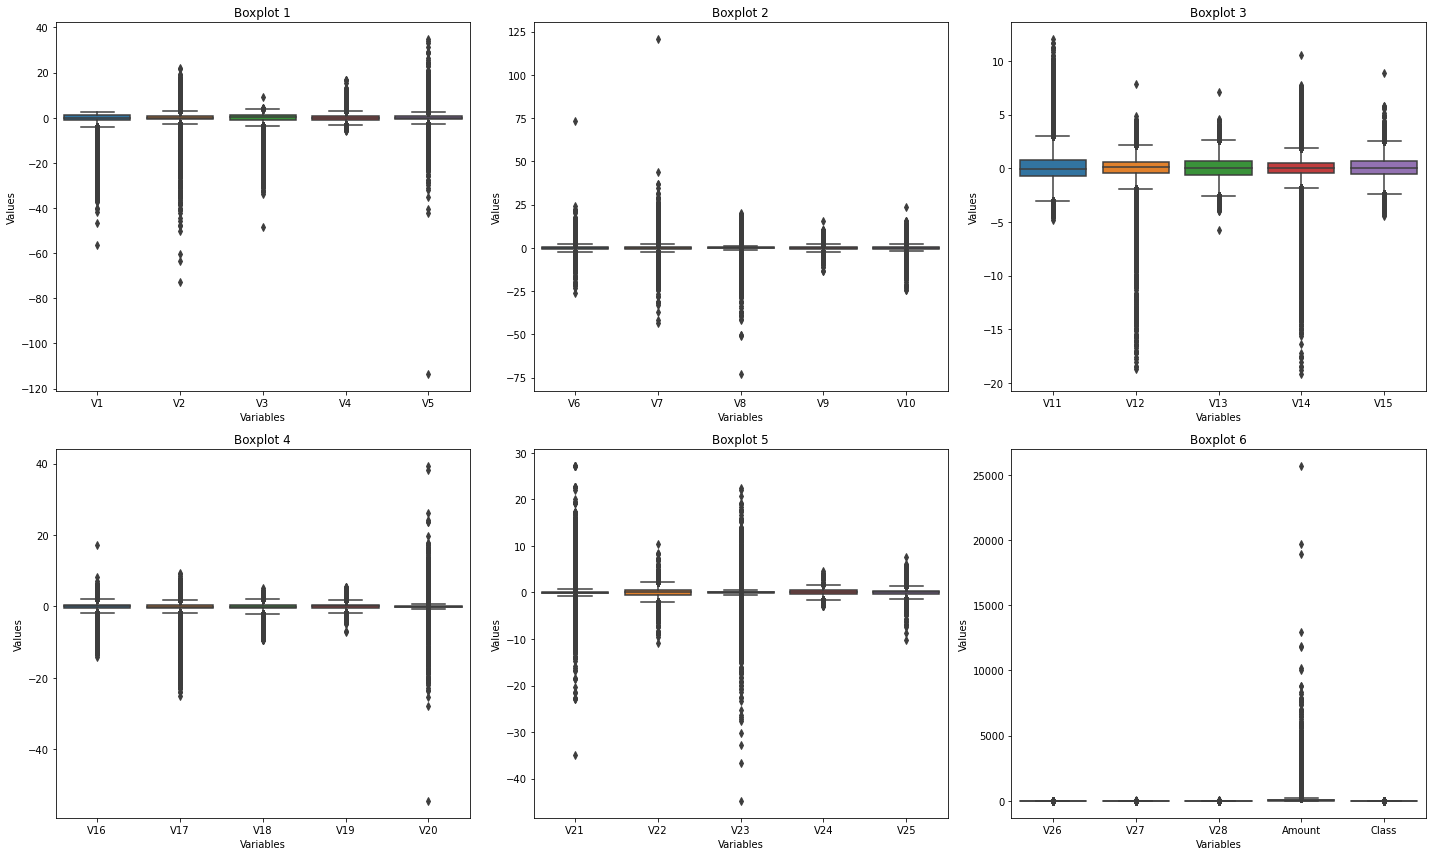

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables to include in each box plot
variables = [['V1', 'V2', 'V3', 'V4', 'V5'],
             ['V6', 'V7', 'V8', 'V9', 'V10'],
             ['V11', 'V12', 'V13', 'V14', 'V15'],
             ['V16', 'V17', 'V18', 'V19', 'V20'],
             ['V21', 'V22', 'V23', 'V24', 'V25'],
             ['V26', 'V27', 'V28', 'Amount', 'Class']]

# Create a single plot with 6 subplots arranged in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # Larger figsize

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each box plot
for i, vars_to_plot in enumerate(variables):
    sns.boxplot(data=df[vars_to_plot], ax=axes[i])
    axes[i].set_title(f'Boxplot {i+1}')
    axes[i].set_xlabel('Variables')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Save the plot as a single image
plt.savefig('boxplots_combined.png')

# Show the plot
plt.show()

Outliers were identified in all variables of the dataset using boxplots and the interquartile range (IQR) method. Box plots are an effective way to gain insights into the data distribution and detect any anomalies. Outliers can significantly impact the performance of machine learning models, so detecting and handling them appropriately is crucial. In the analysis, while outliers were identified in the dataset, they were intentionally retained, particularly in the context of the fraud detection system. It's recognized that extreme values within the features can serve as vital indicators of fraudulent activities. Fraudulent transactions often exhibit anomalous behaviors that deviate significantly from normal patterns. Thus, removing outliers could potentially discard essential information crucial for accurately detecting fraudulent activities. By retaining outliers, it enables the machine learning model to learn from these distinctive patterns, enhancing its ability to discern between legitimate and fraudulent transactions. However, it's essential to approach outlier handling with care, ensuring that their presence does not unduly influence the model's training process. Techniques such as robust model training methods or outlier-specific preprocessing steps can be employed to mitigate any adverse effects of outliers while still leveraging their informative value in the fraud detection task."

### Assess the Need for Standardization and Normalization
Standardization (scaling to have a mean of 0 and a standard deviation of 1) and normalization (scaling to a specific range, e.g., [0, 1]) may be necessary, especially if the machine learning algorithm is sensitive to the scale of input features (e.g., distance-based algorithms like k-nearest neighbors).

If the features in the dataset already have similar scales, standardization or normalization may not provide significant benefits. However, it's always a good practice to check the distribution of feature values to confirm.

Visually inspecting the distribution of each feature and computing summary statistics were done to check if the feature scales are similar. 

The box plot created above verifies that the Features have similar scales this is because they have comparable box plot structures.

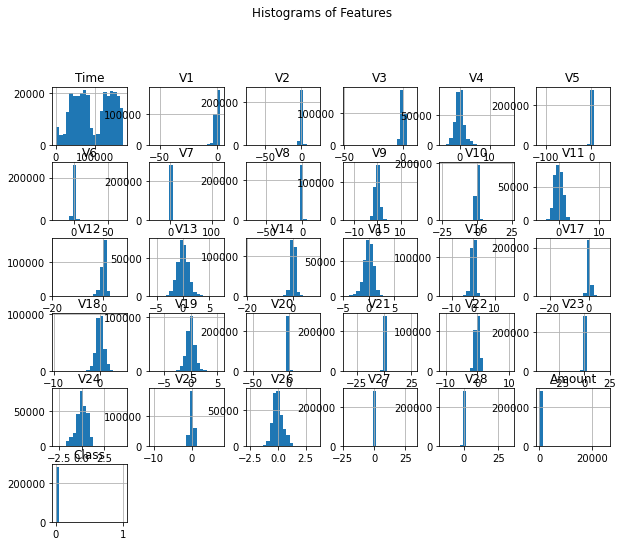

In [8]:
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

From the visuals above it can be seen that scaling is not a necessary transformation.

## Correlation Analysis

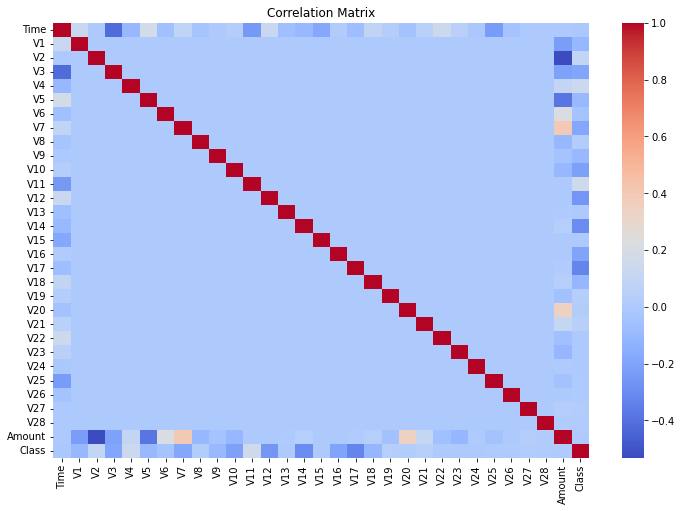

In [9]:
# Plot correlation matrix to identify relationships between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
 

From the matrix above, it can be seen that the correlation between the variables is negative and relatively low. The features V7 and V20 are the only ones that seem to have a positive correlation with the amount variable, which represents the transaction amount. However, based on this orthogonality check, it can be concluded that this is not a cause for concern, as our variables are not correlated at an alarming rate.

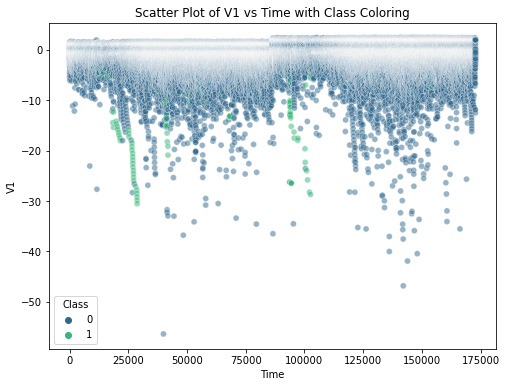

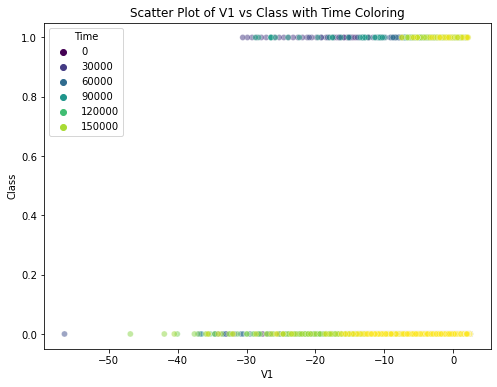

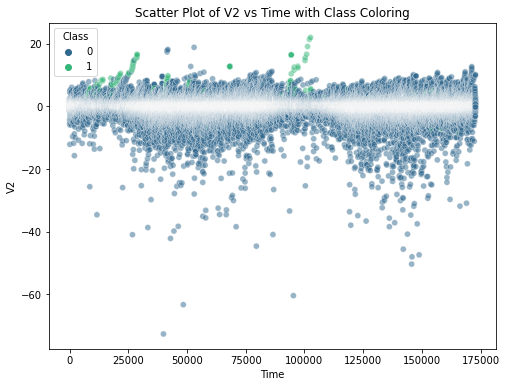

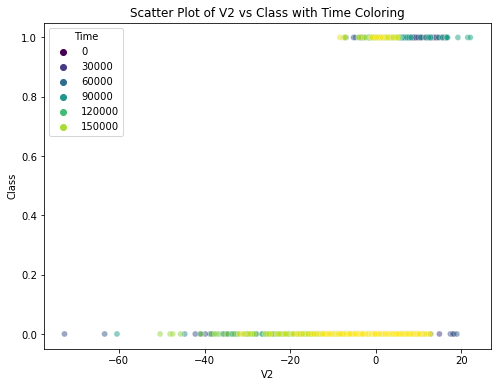

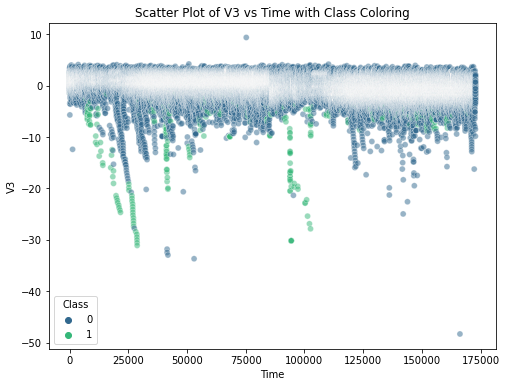

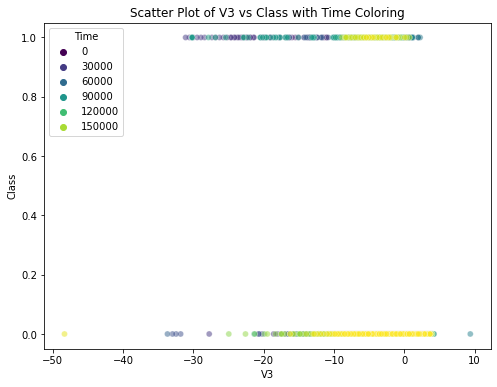

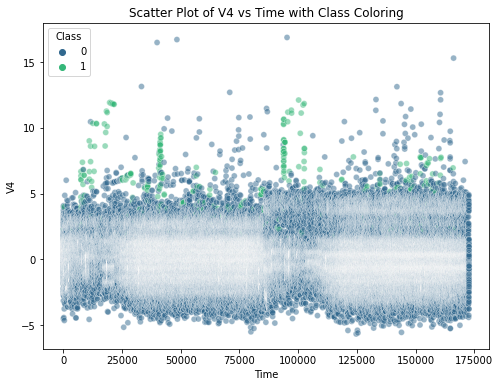

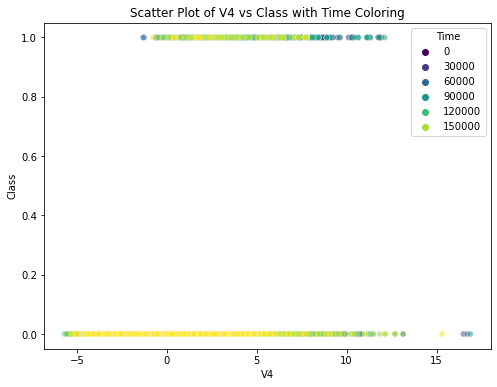

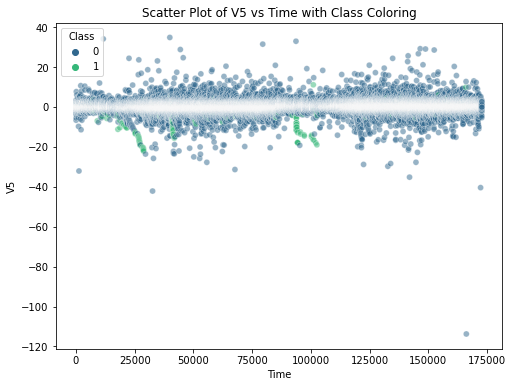

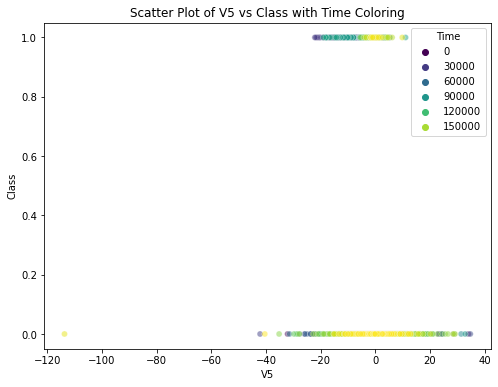

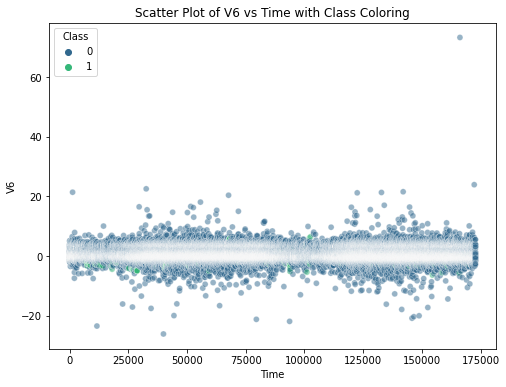

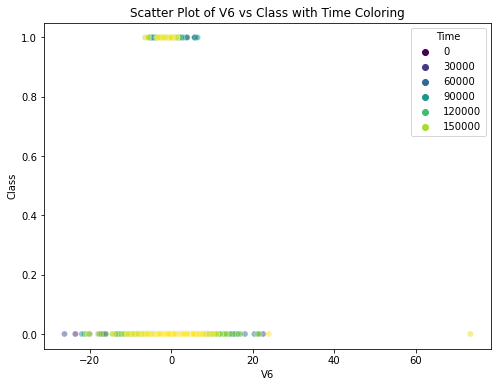

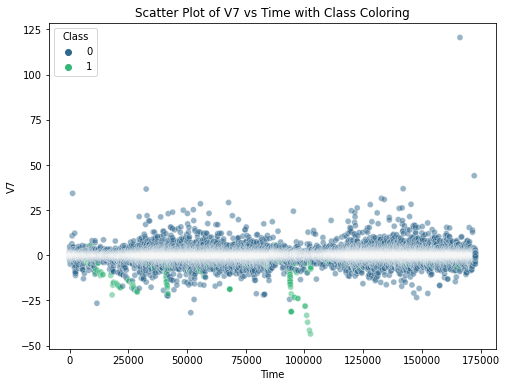

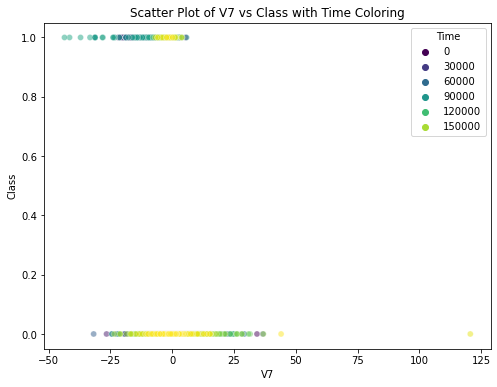

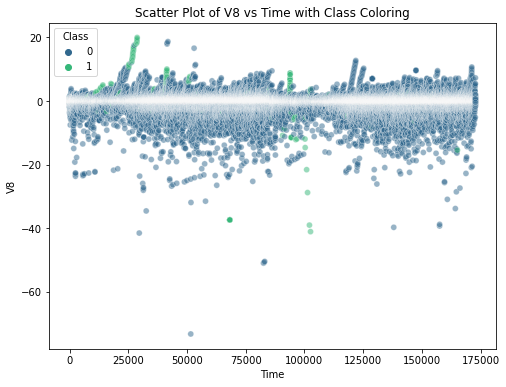

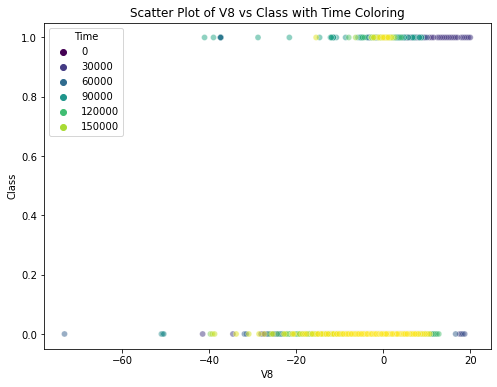

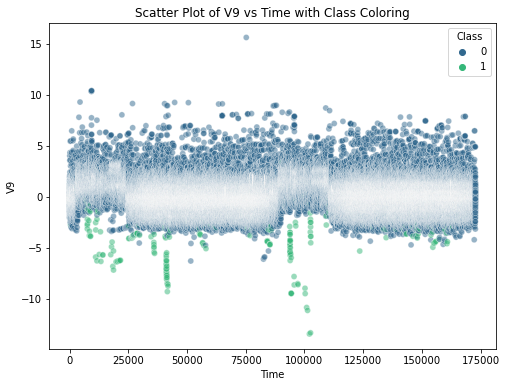

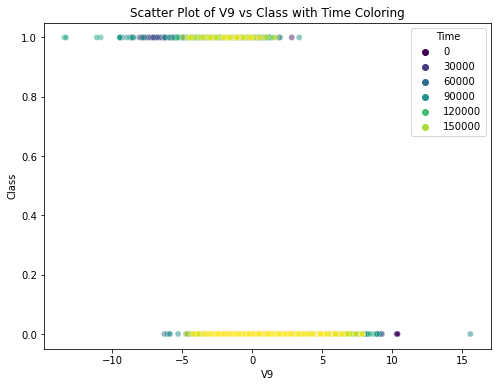

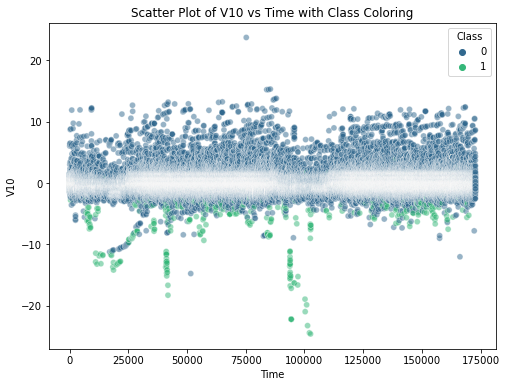

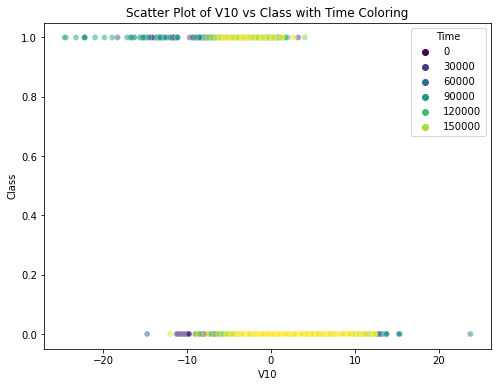

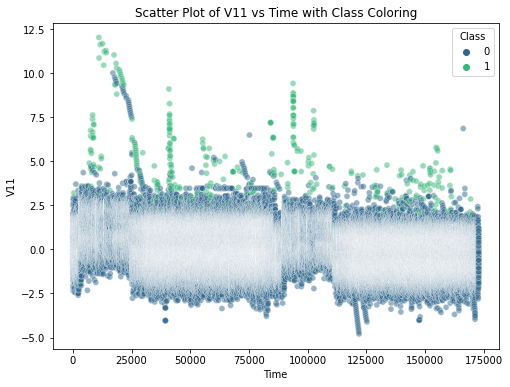

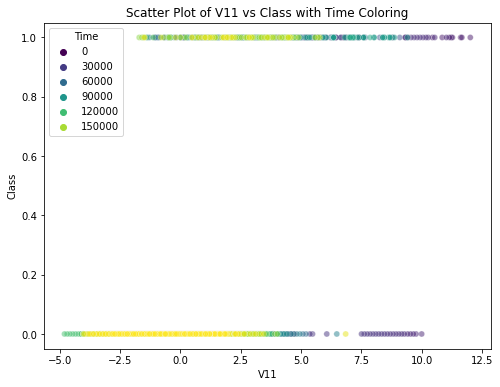

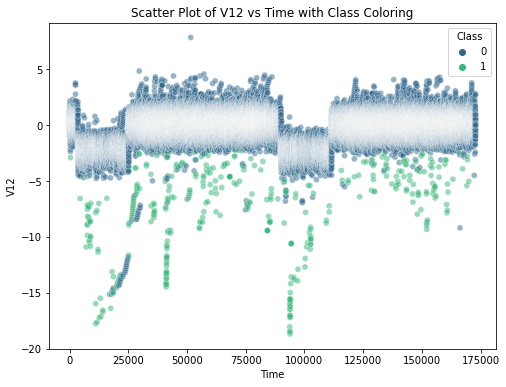

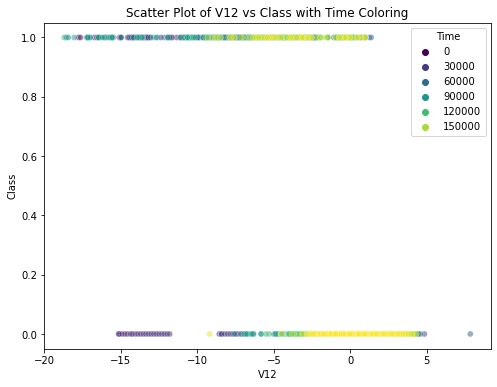

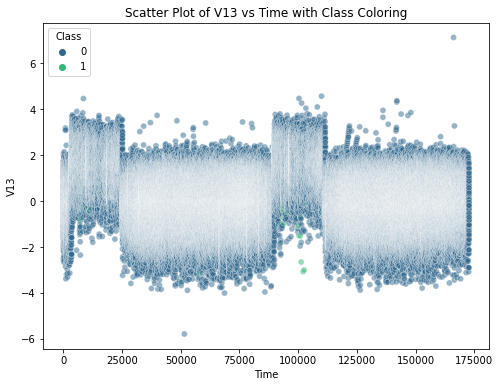

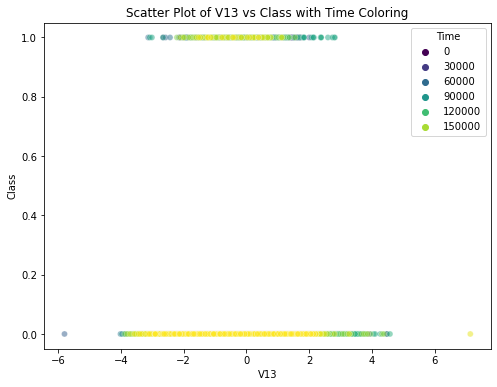

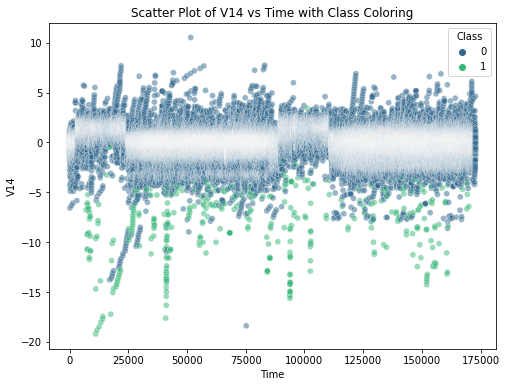

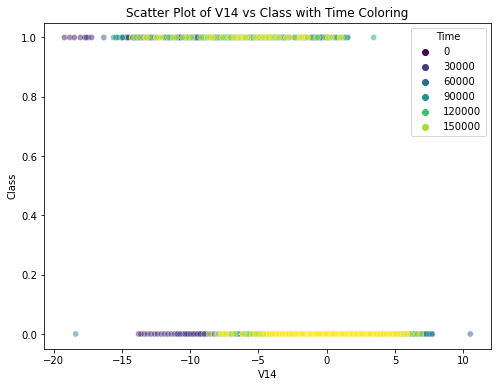

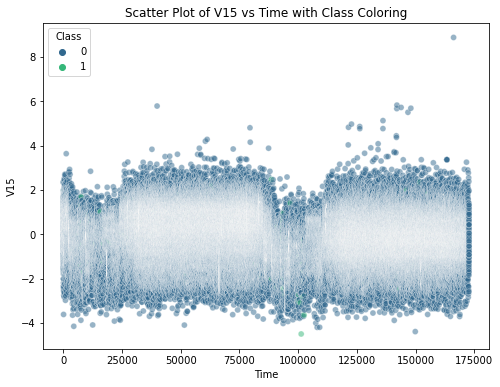

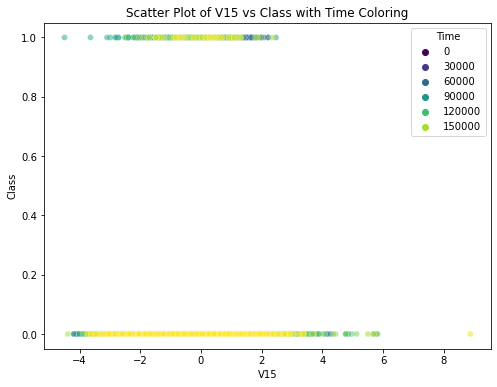

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Time' is the non-numerical variable and 'Class' is the target variable
non_numerical_variable = 'Time'
class_variable = 'Class'
numerical_variables = [col for col in df.columns if col not in [non_numerical_variable, class_variable]]

# Scatter Plots for each pair of numerical variables against 'Time' and 'Class'
for feature in numerical_variables:
    # Scatter Plot against 'Time'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=non_numerical_variable, y=feature, data=df, hue=class_variable, palette='viridis', alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs {non_numerical_variable} with {class_variable} Coloring')
    plt.xlabel(non_numerical_variable)
    plt.ylabel(feature)
    plt.legend(title=class_variable)
    plt.show()

    # Scatter Plot against 'Class'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y=class_variable, data=df, hue=non_numerical_variable, palette='viridis', alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs {class_variable} with {non_numerical_variable} Coloring')
    plt.xlabel(feature)
    plt.ylabel(class_variable)
    plt.legend(title=non_numerical_variable)
    plt.show()


## Model Building

In [ ]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Initialize and train models
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
log_reg.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)  # Decision Tree doesn't require scaling
random_forest.fit(X_train, y_train)  # Random Forest doesn't require scaling

In [ ]:
# Making predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluating model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

print("Logistic Regression Performance:")
print(evaluate_model(y_test, y_pred_log_reg))

print("\nDecision Tree Performance:")
print(evaluate_model(y_test, y_pred_decision_tree))

print("\nRandom Forest Performance:")
print(evaluate_model(y_test, y_pred_random_forest))

1. **Logistic Regression Performance**:
   - Accuracy: 99.91%
   - Precision: 86.36%
   - Recall: 58.16%
   - F1 Score: 69.51%

These results indicate that the logistic regression model has high accuracy and precision, meaning it correctly identifies a large portion of fraudulent transactions while minimizing false positives. However, its recall and F1 score are relatively lower, suggesting that it may miss some fraudulent transactions (false negatives).

2. **Decision Tree Performance**:
   - Accuracy: 99.90%
   - Precision: 68.14%
   - Recall: 78.57%
   - F1 Score: 72.99%

The decision tree model has a slightly lower accuracy compared to logistic regression but shows higher recall. This means it captures more fraudulent transactions but might also produce more false positives. The precision is lower, indicating that a higher proportion of flagged fraud cases may be false alarms.

3. **Random Forest Performance**:
   - Accuracy: 99.96%
   - Precision: 96.20%
   - Recall: 77.55%
   - F1 Score: 85.88%

The random forest model exhibits the highest accuracy among the three models, along with very high precision. It effectively identifies fraudulent transactions with minimal false positives. However, its recall is lower compared to precision, indicating that it may miss some fraudulent cases.

The choice of model may depend on the specific priorities of the fraud detection system. If minimizing false positives (precision) is crucial, the random forest model may be preferred. If maximizing the capture of fraudulent transactions (recall) is more important, the decision tree model might be favored.

Minimizing false positives involves minimizing cases flagged as fraudulent but are not.
Maximize the capture of fraudulent transactions involves identifying all fraudulent cases, even if it means some false alarms).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating confusion matrices for all models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [y_pred_log_reg, y_pred_decision_tree, y_pred_random_forest]

for i, pred in enumerate(predictions):
    conf_matrix = confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {models[i]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Model Evaluation and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Define parameter grids for each model
param_grid_log_reg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_decision_tree = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
param_grid_random_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Perform GridSearchCV or RandomizedSearchCV for each model
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='accuracy')
random_search_random_forest = RandomizedSearchCV(random_forest, param_distributions=param_grid_random_forest, n_iter=10, cv=5, scoring='accuracy')

# Fit the models with the training data
grid_search_log_reg.fit(X_train_scaled, y_train)
grid_search_decision_tree.fit(X_train, y_train)
random_search_random_forest.fit(X_train, y_train)

# Evaluate models using cross-validation
cv_scores_log_reg = cross_val_score(grid_search_log_reg.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_decision_tree = cross_val_score(grid_search_decision_tree.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_random_forest = cross_val_score(random_search_random_forest.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy - Logistic Regression:", cv_scores_log_reg.mean())
print("Std CV Accuracy - Logistic Regression:", cv_scores_log_reg.std())
print("Mean CV Accuracy - Decision Tree:", cv_scores_decision_tree.mean())
print("Std CV Accuracy - Decision Tree:", cv_scores_decision_tree.std())
print("Mean CV Accuracy - Random Forest:", cv_scores_random_forest.mean())
print("Std CV Accuracy - Random Forest:", cv_scores_random_forest.std())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate models using cross-validation on the test set
y_pred_log_reg_test = grid_search_log_reg.best_estimator_.predict(X_test_scaled)
y_pred_decision_tree_test = grid_search_decision_tree.best_estimator_.predict(X_test)
y_pred_random_forest_test = random_search_random_forest.best_estimator_.predict(X_test)

# Calculate accuracy scores
cv_accuracy_log_reg = accuracy_score(y_test, grid_search_log_reg.best_estimator_.predict(X_test_scaled))
cv_accuracy_decision_tree = accuracy_score(y_test, grid_search_decision_tree.best_estimator_.predict(X_test))
cv_accuracy_random_forest = accuracy_score(y_test, random_search_random_forest.best_estimator_.predict(X_test))

# Calculate precision scores
precision_log_reg = precision_score(y_test, y_pred_log_reg_test)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree_test)
precision_random_forest = precision_score(y_test, y_pred_random_forest_test)

# Calculate recall scores
recall_log_reg = recall_score(y_test, y_pred_log_reg_test)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree_test)
recall_random_forest = recall_score(y_test, y_pred_random_forest_test)

# Calculate F1 scores
f1_log_reg = f1_score(y_test, y_pred_log_reg_test)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree_test)
f1_random_forest = f1_score(y_test, y_pred_random_forest_test)

# Print the accuracy scores
print("Accuracy - Logistic Regression (CV on test set):", cv_accuracy_log_reg)
print("Accuracy - Decision Tree (CV on test set):", cv_accuracy_decision_tree)
print("Accuracy - Random Forest (CV on test set):", cv_accuracy_random_forest)

# Print the precision scores
print("Precision - Logistic Regression (CV on test set):", precision_log_reg)
print("Precision - Decision Tree (CV on test set):", precision_decision_tree)
print("Precision - Random Forest (CV on test set):", precision_random_forest)

# Print the recall scores
print("Recall - Logistic Regression (CV on test set):", recall_log_reg)
print("Recall - Decision Tree (CV on test set):", recall_decision_tree)
print("Recall - Random Forest (CV on test set):", recall_random_forest)

# Print the F1 scores
print("F1-score - Logistic Regression (CV on test set):", f1_log_reg)
print("F1-score - Decision Tree (CV on test set):", f1_decision_tree)
print("F1-score - Random Forest (CV on test set):", f1_random_forest)


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Define the performance metrics before hyperparameter tuning
accuracy_before_tuning = [accuracy_score(y_test, y_pred_log_reg), 
                          accuracy_score(y_test, y_pred_decision_tree), 
                          accuracy_score(y_test, y_pred_random_forest)]

# Define the performance metrics after hyperparameter tuning
accuracy_after_tuning = [grid_search_log_reg.best_score_,
                         grid_search_decision_tree.best_score_,
                         random_search_random_forest.best_score_]

# Calculate precision scores before tuning
precision_before_tuning = [precision_score(y_test, y_pred_log_reg), 
                            precision_score(y_test, y_pred_decision_tree), 
                            precision_score(y_test, y_pred_random_forest)]

# Calculate recall scores before tuning
recall_before_tuning = [recall_score(y_test, y_pred_log_reg), 
                        recall_score(y_test, y_pred_decision_tree), 
                        recall_score(y_test, y_pred_random_forest)]

# Calculate F1 scores before tuning
f1_before_tuning = [f1_score(y_test, y_pred_log_reg), 
                    f1_score(y_test, y_pred_decision_tree), 
                    f1_score(y_test, y_pred_random_forest)]

# Calculate precision scores after tuning
precision_after_tuning = [precision_score(y_test, grid_search_log_reg.best_estimator_.predict(X_test_scaled)), 
                            precision_score(y_test, grid_search_decision_tree.best_estimator_.predict(X_test)), 
                            precision_score(y_test, random_search_random_forest.best_estimator_.predict(X_test))]

# Calculate recall scores after tuning
recall_after_tuning = [recall_score(y_test, grid_search_log_reg.best_estimator_.predict(X_test_scaled)), 
                        recall_score(y_test, grid_search_decision_tree.best_estimator_.predict(X_test)), 
                        recall_score(y_test, random_search_random_forest.best_estimator_.predict(X_test))]

# Calculate F1 scores after tuning
f1_after_tuning = [f1_score(y_test, grid_search_log_reg.best_estimator_.predict(X_test_scaled)), 
                    f1_score(y_test, grid_search_decision_tree.best_estimator_.predict(X_test)), 
                    f1_score(y_test, random_search_random_forest.best_estimator_.predict(X_test))]

# Calculate accuracy before tuning
accuracy_before_tuning = [accuracy_score(y_test, y_pred_log_reg), 
                          accuracy_score(y_test, y_pred_decision_tree), 
                          accuracy_score(y_test, y_pred_random_forest)]

# Calculate accuracy after tuning
accuracy_after_tuning = [accuracy_score(y_test, grid_search_log_reg.best_estimator_.predict(X_test_scaled)), 
                            accuracy_score(y_test, grid_search_decision_tree.best_estimator_.predict(X_test)), 
                            accuracy_score(y_test, random_search_random_forest.best_estimator_.predict(X_test))]

# Create subplots for each metric
fig = make_subplots(rows=2, cols=2, subplot_titles=("Precision", "Recall", "F1-score", "Accuracy"), vertical_spacing=0.1)

# Add traces for precision
fig.add_trace(go.Scatter(x=model_names, y=precision_before_tuning, mode='markers', name='Before Tuning', marker=dict(color='green', symbol='triangle-up')), row=1, col=1)
fig.add_trace(go.Scatter(x=model_names, y=precision_after_tuning, mode='markers', name='After Tuning', marker=dict(color='yellow', symbol='triangle-up')), row=1, col=1)

# Add traces for recall
fig.add_trace(go.Scatter(x=model_names, y=recall_before_tuning, mode='markers', name='Before Tuning', marker=dict(color='cyan', symbol='square')), row=1, col=2)
fig.add_trace(go.Scatter(x=model_names, y=recall_after_tuning, mode='markers', name='After Tuning', marker=dict(color='magenta', symbol='square')), row=1, col=2)

# Add traces for F1-score
fig.add_trace(go.Scatter(x=model_names, y=f1_before_tuning, mode='markers', name='Before Tuning', marker=dict(color='orange', symbol='circle')), row=2, col=1)
fig.add_trace(go.Scatter(x=model_names, y=f1_after_tuning, mode='markers', name='After Tuning', marker=dict(color='purple', symbol='circle')), row=2, col=1)

# Add traces for Accuracy
fig.add_trace(go.Scatter(x=model_names, y=accuracy_before_tuning, mode='markers', name='Before Tuning', marker=dict(color='blue', symbol='diamond')), row=2, col=2)
fig.add_trace(go.Scatter(x=model_names, y=accuracy_after_tuning, mode='markers', name='After Tuning', marker=dict(color='red', symbol='diamond')), row=2, col=2)

# Update layout
fig.update_layout(title='Change in Metrics Before and After Hyperparameter Tuning', showlegend=True, yaxis=dict(range=[0, 1]), height=800, width=1000)

fig.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.metrics import average_precision_score

# Define the model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Calculate AUPRC before tuning
auprc_before_tuning = [average_precision_score(y_test, y_pred_log_reg), 
                       average_precision_score(y_test, y_pred_decision_tree), 
                       average_precision_score(y_test, y_pred_random_forest)]

# Calculate AUPRC after tuning
auprc_after_tuning = [average_precision_score(y_test, grid_search_log_reg.best_estimator_.predict_proba(X_test_scaled)[:, 1]), 
                      average_precision_score(y_test, grid_search_decision_tree.best_estimator_.predict_proba(X_test)[:, 1]), 
                      average_precision_score(y_test, random_search_random_forest.best_estimator_.predict_proba(X_test)[:, 1])]

# Create subplots
fig = make_subplots(rows=1, cols=1, subplot_titles=("AUPRC Before and After Tuning"), vertical_spacing=0.1)

# Add traces for AUPRC before tuning
fig.add_trace(go.Bar(x=model_names, y=auprc_before_tuning, name='Before Tuning', marker=dict(color='blue')), row=1, col=1)

# Add traces for AUPRC after tuning
fig.add_trace(go.Bar(x=model_names, y=auprc_after_tuning, name='After Tuning', marker=dict(color='orange')), row=1, col=1)

# Update layout
fig.update_layout(title='AUPRC Before and After Hyperparameter Tuning', showlegend=True, yaxis=dict(title='AUPRC'), xaxis=dict(title='Model'))

fig.show()


In [ ]:
# Calculate AUPRC before tuning
auprc_before_tuning 

In [ ]:
# Calculate AUPRC after tuning
auprc_after_tuning 

In a fraud detection system, the goal is to identify fraudulent transactions while minimizing false positives (genuine transactions incorrectly flagged as fraudulent). Therefore, precision is often a crucial metric because it measures the proportion of correctly identified fraudulent transactions out of all transactions flagged as fraudulent.

Given this context:

1. **Precision:** Random Forest has the highest precision score, indicating that it is better at minimizing false positives. This means that it is more likely to correctly identify fraudulent transactions while minimizing the number of genuine transactions incorrectly flagged as fraudulent.

2. **Recall:** Recall is also important in fraud detection because it measures the ability to correctly identify all fraudulent transactions. Both Decision Tree and Random Forest have similar recall scores, which are higher than that of Logistic Regression. This means that they are better at capturing a higher proportion of fraudulent transactions.

3. **F1-score:** F1-score provides a balance between precision and recall. Random Forest has the highest F1-score, indicating a good balance between precision and recall. This means that it is able to correctly identify a high proportion of fraudulent transactions while keeping false positives relatively low.

4. **AUPRC (Area Under the Precision-Recall Curve):** the Random Forest model demonstrates the highest performance in terms of AUPRC, making it the most promising model for the fraud detection task. Tuning has proven to be beneficial for all models, with noticeable improvements in their AUPRC values.

Considering these factors, Random Forest seems to be the most suitable model for the fraud detection system, as it achieves the best balance between precision and recall, which are both important metrics in this context.

## Prepare the Model for Deployment
Serialize your trained model using the `joblib` library.

In [ ]:
import joblib

# Save the trained Logistic Regression model to a file
joblib.dump(random_search_random_forest.best_estimator_, 'random_forest_model.pkl')
